**Analysis for the Prediction and the extracted grammer structure by the model**    


In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})

In [ ]:
from matplotlib import rc
rc('pdf', fonttype=42)

In [ ]:
files = np.arange(21281,21291).tolist();

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "gdrive/My Drive/Colab/NLP"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Colab/NLP'
/content/gdrive/My Drive/Colab/NLP


In [ ]:
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib

In [ ]:
# +++ to save and lead matlab files +++
!pip install mat4py
from mat4py import loadmat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
INTACT = 0; BLOCK_RECURRENT = 1;
rnn_cond = INTACT;

In [ ]:
inc_tmstep_valrate = [32,16,0.9];  lr = 0.004 * np.array([1,1,1,1,1])

In [ ]:
pop_loss, pop_inc_lr,pop_loss_his_np,pop_acc_L, pop_acc_noL, pop_acc_pc_df, pop_svm_ax, pop_val2_acc, pop_val2_eg, pop_pca_ratio, pop_SVM_ratio, pop_acc_L_io, pop_acc_nL_io = [],[],[],[],[],[],[],[],[],[],[],[],[]
for i in range(len(files)):
    ver = files[i];
    w_idx, idx_to_word, sents, loss_his, inc_tmstep_valrate, w2v_out = joblib.load('./saved_model/np_'+'{0:03d}'.format(ver)+'.pkl')
    pop_loss.append(loss_his)
    increments = inc_tmstep_valrate[0];   train_val_rate = inc_tmstep_valrate[2];   ep_lg = (len(loss_his[0])-1)/increments;
    if len(inc_tmstep_valrate)>3:  lr = inc_tmstep_valrate[3];  # available after ver2006
    pop_inc_lr.append( np.array( [increments, ep_lg, lr[0]] ) )
    if rnn_cond == INTACT:  data2 = loadmat('./saved_mat/v'+str(ver)+'.mat')
    else:                   data2 = loadmat('./saved_mat/v'+str(ver)+'_i.mat')
    pop_acc_L.append(data2['acc_L']);  pop_acc_noL.append(data2['acc_noL']);   pop_loss_his_np.append(data2['loss_his']);
    pop_acc_pc_df.append(data2['acc_pc_df']);   pop_svm_ax.append(data2['svm_ax']);
    pop_val2_acc.append(data2['val2_acc_a_41_42_61_0']);     pop_val2_eg.append(data2['acc2_boat_noise_book']);
    pop_pca_ratio.append(data2['pca_val_ratio']);            pop_SVM_ratio.append(data2['var_ratio_SVM']);
    acc_L_io = np.nan*np.ones((4,6));  acc_nL_io = np.nan*np.ones((4,6));
    if 'acc_L_io' in data2:    acc_L_io=data2['acc_L_io'];  acc_nL_io=data2['acc_nL_io'];
    pop_acc_L_io.append(acc_L_io);     pop_acc_nL_io.append(acc_nL_io);

In [ ]:
[np.shape(pop_svm_ax[i]) for i in range(len(pop_svm_ax))]

[(32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4),
 (32, 4)]

In [ ]:
[np.shape(pop_loss_his_np[i]) for i in range(len(pop_loss_his_np))]

[(5, 257),
 (5, 257),
 (5, 257),
 (5, 257),
 (5, 257),
 (5, 257),
 (5, 257),
 (5, 257),
 (5, 257),
 (5, 257)]

In [ ]:
pop_acc_L = np.stack(pop_acc_L);                    pop_acc_noL = np.stack(pop_acc_noL)
pop_acc_pc_df = np.stack(pop_acc_pc_df, axis=2);    pop_svm_ax = np.stack(pop_svm_ax, axis=2)
pop_val2_acc = np.stack(pop_val2_acc);              pop_val2_eg = np.stack(pop_val2_eg);
pop_pca_ratio = np.stack(pop_pca_ratio);            pop_SVM_ratio = np.stack(pop_SVM_ratio);
pop_acc_L_io = np.stack(pop_acc_L_io, axis=2);      pop_acc_nL_io = np.stack(pop_acc_nL_io, axis=2)
pop_loss_his = np.stack(pop_loss_his_np, axis=2);       # pop_loss_his = np.stack(pop_loss, axis=2);

In [ ]:
########### accuracy rate for all_41_42_61_0 #############
pop_val2_acc

array([[33.0, 47.8, 17.0, 63.3, 38.6],
       [32.5, 60.9, 18.1, 63.3, 37.8],
       [34.0, 47.8, 17.0, 56.7, 38.2],
       [32.9, 69.6, 14.9, 66.7, 35.7],
       [32.2, 52.2, 14.9, 66.7, 36.7],
       [34.4, 56.5, 16.0, 60.0, 38.4],
       [33.4, 65.2, 14.9, 66.7, 36.5],
       [33.6, 65.2, 14.9, 66.7, 38.2],
       [32.6, 56.5, 21.3, 70.0, 36.5],
       [32.9, 56.5, 16.0, 60.0, 36.9]])

In [ ]:
percntl_val2_acc = np.percentile(pop_val2_acc,[25,50,75],axis=0)

In [ ]:
percntl_val2_acc, #### prediction correct rate for val 2 ######, total, 41(pronoun), 42(V-noun), 61(preposition), (other words)

(array([[32.7, 53.3, 14.9, 60.8, 36.6],
        [33.0, 56.5, 16.0, 65.0, 37.3],
        [33.6, 64.1, 17.0, 66.7, 38.2]]),)

In [ ]:
########### accuracy rate for boat, noise, book #############
np.mean(pop_val2_eg, axis=0),  pop_val2_eg

(array([0.5, 0.0, 0.1]), array([[1.0, 0.0, 0.0],
        [1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 1.0],
        [1.0, 0.0, 0.0],
        [1.0, 0.0, 0.0],
        [1.0, 0.0, 0.0],
        [0.0, 0.0, 0.0]]))

In [ ]:
pop_inc_lr,

([array([32.0, 8.0, 0.0]),
  array([32.0, 8.0, 0.0]),
  array([32.0, 8.0, 0.0]),
  array([32.0, 8.0, 0.0]),
  array([32.0, 8.0, 0.0]),
  array([32.0, 8.0, 0.0]),
  array([32.0, 8.0, 0.0]),
  array([32.0, 8.0, 0.0]),
  array([32.0, 8.0, 0.0]),
  array([32.0, 8.0, 0.0])],)

In [ ]:
########### classification accuracy rate of SVM #############
print(pop_acc_L),
print(pop_acc_noL)

[[95.0 92.3 95.7 93.0 91.9 90.6]
 [94.6 92.9 94.7 92.0 92.3 89.7]
 [92.5 90.8 91.5 89.2 91.9 84.1]
 [95.5 93.4 93.9 92.3 93.2 88.8]
 [95.5 91.4 90.8 91.6 92.5 90.9]
 [94.7 91.3 95.3 92.0 91.3 90.1]
 [96.4 94.1 95.1 93.1 94.8 89.8]
 [94.6 92.9 91.6 90.0 93.1 87.0]
 [93.4 92.1 91.5 89.3 90.1 89.6]
 [95.6 94.3 92.5 90.7 93.6 89.3]]
[[96.6 94.3 96.0 95.3 93.5 92.3]
 [96.4 92.0 95.8 95.1 90.7 92.4]
 [95.9 93.0 93.9 93.2 94.0 91.1]
 [96.2 93.7 96.1 95.0 93.5 93.6]
 [97.0 93.9 96.4 95.1 94.3 93.9]
 [96.8 90.9 96.1 95.5 91.7 92.7]
 [97.2 94.2 96.4 94.8 95.3 93.2]
 [96.7 93.8 94.5 92.6 95.0 89.8]
 [95.6 93.2 95.1 92.1 93.7 91.4]
 [96.9 93.9 95.6 94.3 94.7 93.7]]


In [ ]:
percntl_acc_L = np.percentile(pop_acc_L,[25,50,75],axis=0)
percntl_acc_noL = np.percentile(pop_acc_noL,[25,50,75],axis=0)

In [ ]:
percntl_acc_L, percntl_acc_noL

(array([[94.6, 91.6, 91.6, 90.2, 91.9, 88.9],
        [94.9, 92.6, 93.2, 91.8, 92.4, 89.6],
        [95.5, 93.3, 95.0, 92.2, 93.2, 90.0]]),
 array([[96.3, 93.0, 95.2, 93.5, 93.5, 91.6],
        [96.6, 93.7, 95.9, 94.9, 93.8, 92.6],
        [96.9, 93.9, 96.1, 95.1, 94.6, 93.5]]))

In [ ]:
################### loss, learning curve #############################
pop_loss = np.transpose(pop_loss_his, (1, 2, 0))
percntl_loss = np.percentile(pop_loss,[25,50,75],axis=1)

In [ ]:
percntl_loss[:,:,1] = 100 * percntl_loss[:,:,1];   percntl_loss[:,:,3] = 100 * percntl_loss[:,:,3];    percntl_loss[:,:,4] = 100 * percntl_loss[:,:,4];


In [ ]:
np.mean(percntl_loss[:,-4:,:], axis=1)

array([[1.7, 42.2, 2.2, 33.0, 25.7],
       [1.7, 42.7, 2.3, 33.6, 26.4],
       [1.8, 43.2, 2.3, 34.2, 27.1]])

In [ ]:
chance = 17.364365507554574

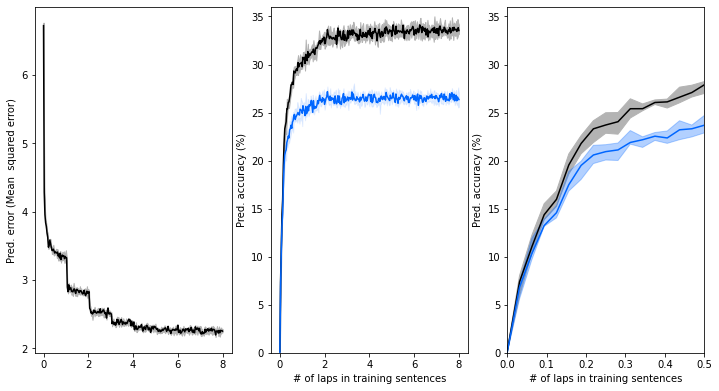

In [ ]:
fig = plt.figure(figsize=(12, 14)) # figure area
plt.subplot(2,3,1);
plt.fill_between(np.arange(pop_loss.shape[0])/increments, percntl_loss[0,:,2], percntl_loss[2,:,2], color=[0.7, 0.7, 0.7, 1])
plt.plot(np.arange(pop_loss.shape[0])/increments, percntl_loss[1,:,2], color=[0, 0, 0, 1])
plt.ylabel("Pred. error (Mean  squared error)")

plt.subplot(2,3,2);
plt.fill_between(np.arange(pop_loss.shape[0])/increments, percntl_loss[0,:,3], percntl_loss[2,:,3], color=[0.7, 0.7, 0.7, 1])
plt.plot(np.arange(pop_loss.shape[0])/increments, percntl_loss[1,:,3], color=[0, 0, 0, 1])
plt.fill_between(np.arange(pop_loss.shape[0])/increments, percntl_loss[0,:,4], percntl_loss[2,:,4], color=[0.0, 0.4, 1, 0.1])
plt.plot(np.arange(pop_loss.shape[0])/increments, percntl_loss[1,:,4], color=[0.0, 0.4, 1, 1])
plt.xlabel("# of laps in training sentences"),  plt.ylabel("Pred. accuracy (%)");
plt.ylim([0,36]);

plt.subplot(2,3,3);
plt.fill_between(np.arange(pop_loss.shape[0])/increments, percntl_loss[0,:,3], percntl_loss[2,:,3], color=[0.7, 0.7, 0.7, 1])
plt.plot(np.arange(pop_loss.shape[0])/increments, percntl_loss[1,:,3], color=[0, 0, 0, 1])
plt.fill_between(np.arange(pop_loss.shape[0])/increments, percntl_loss[0,:,4], percntl_loss[2,:,4], color=[0.0, 0.4, 1, 0.3])
plt.plot(np.arange(pop_loss.shape[0])/increments, percntl_loss[1,:,4], color=[0.0, 0.4, 1, 1])
plt.xlabel("# of laps in training sentences"),  plt.ylabel("Pred. accuracy (%)");
plt.xlim([0,0.5]);
plt.ylim([0,36]);

In [ ]:
str_c = ['','i'];

In [ ]:
fig.savefig('./saved_img/pop1_1' +str_c[rnn_cond]+ '.pdf')

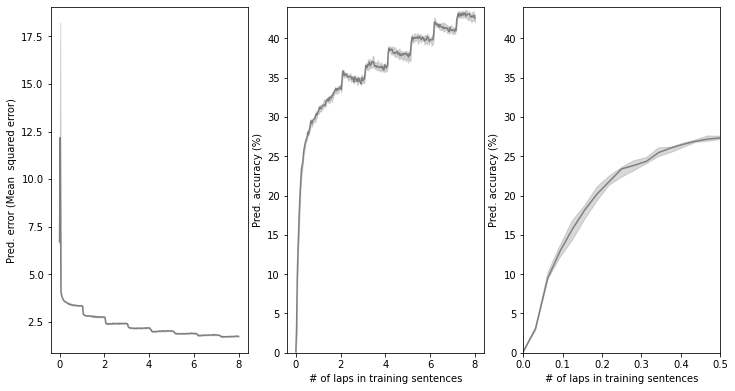

In [ ]:
fig = plt.figure(figsize=(12, 14)) # figure area
plt.subplot(2,3,1);
plt.fill_between(np.arange(pop_loss.shape[0])/increments, percntl_loss[0,:,0], percntl_loss[2,:,0], color=[0.5, 0.5, 0.5, 0.3])
plt.plot(np.arange(pop_loss.shape[0])/increments, percntl_loss[1,:,0], color=[0.5, 0.5, 0.5, 1])
plt.ylabel("Pred. error (Mean  squared error)")

plt.subplot(2,3,2);
plt.fill_between(np.arange(pop_loss.shape[0])/increments, percntl_loss[0,:,1], percntl_loss[2,:,1], color=[0.5, 0.5, 0.5, 0.3])
plt.plot(np.arange(pop_loss.shape[0])/increments, percntl_loss[1,:,1], color=[0.5, 0.5, 0.5, 1])
plt.xlabel("# of laps in training sentences"),  plt.ylabel("Pred. accuracy (%)");
plt.ylim([0,44]);

plt.subplot(2,3,3);
plt.fill_between(np.arange(pop_loss.shape[0])/increments, percntl_loss[0,:,1], percntl_loss[2,:,1], color=[0.5, 0.5, 0.5, 0.3])
plt.plot(np.arange(pop_loss.shape[0])/increments, percntl_loss[1,:,1], color=[0.5, 0.5, 0.5, 1])
plt.xlabel("# of laps in training sentences"),  plt.ylabel("Pred. accuracy (%)");
plt.xlim([0,0.5]);   plt.ylim([0,44]);

In [ ]:
fig.savefig('./saved_img/pop1_2' +str_c[rnn_cond]+ '.pdf')

In [ ]:
import seaborn as sns

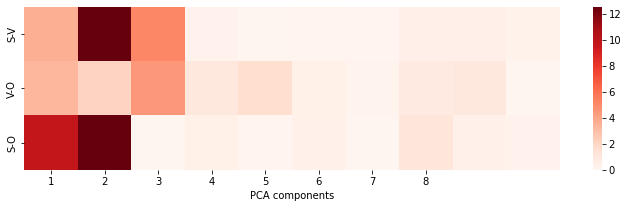

In [ ]:
plt.figure(figsize=(12, 3)) # figure area
sns.heatmap(np.mean(pop_acc_pc_df[:,:3,:], axis=2).T, cmap='Reds',vmin=0);
plt.xticks(np.arange(8)+0.5,np.arange(8)+1);
plt.yticks(np.arange(3)+0.5,['S-V','V-O',"S-O"]);

plt.xlabel('PCA components');

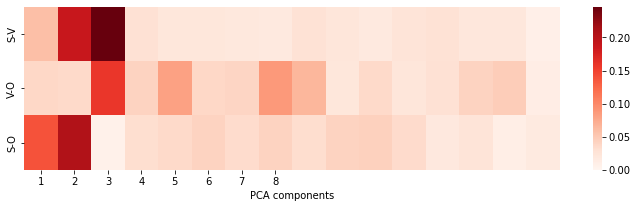

In [ ]:
fig = plt.figure(figsize=(12, 3)) # figure area
sns.heatmap(np.mean(np.square(pop_svm_ax[:16,:3,:]), axis=2).T, cmap='Reds',vmin=0);
plt.xticks(np.arange(8)+0.5,np.arange(8)+1);
plt.yticks(np.arange(3)+0.5,['S-V','V-O',"S-O"]);
plt.xlabel('PCA components');

In [ ]:
fig.savefig('./saved_img/pop1_3' +str_c[rnn_cond]+ '.pdf')

In [ ]:
########### classification accuracy rate of SVM #############
percntl_SVM_ratio = np.percentile(pop_SVM_ratio,[25,50,75],axis=0)
percntl_pca_ratio = np.percentile(pop_pca_ratio,[25,50,75],axis=0)

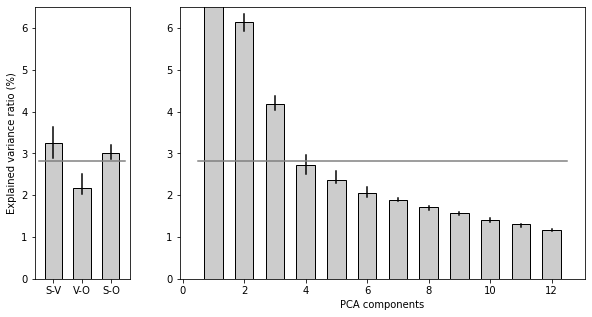

In [ ]:
fig = plt.figure(figsize = (16, 5))
plt.subplot(1,8,4)
plt.bar(['S-V', 'V-O', 'S-O'], 100*percntl_SVM_ratio[1,:3], edgecolor='black',  color = [0.8,0.8,0.8],   width = 0.6);
for i in range(3):     plt.plot(i*np.array([1,1]), 100*percntl_SVM_ratio[[0,2],i], color='black')
plt.plot([-0.5,2.5], np.array([1,1])*np.mean(100*percntl_SVM_ratio[1,:3]), color='gray')
plt.ylim([0, 6.5]);  plt.ylabel('Explained variance ratio (%)');
plt.subplot(1,2,2)
plt.bar(np.arange(12)+1, 100*percntl_pca_ratio[1,:12], edgecolor='black',  color = [0.8,0.8,0.8],   width = 0.6);
for i in range(12):    plt.plot(1+i*np.array([1,1]), 100*percntl_pca_ratio[[0,2],i], color='black')
plt.plot([0.5,12.5], np.array([1,1])*np.mean(100*percntl_SVM_ratio[1,:3]), color='gray')
plt.ylim([0, 6.5]);  plt.xlabel('PCA components');

In [ ]:
100*percntl_SVM_ratio[1,:3]

array([3.2, 2.2, 3.0])

In [ ]:
fig.savefig('./saved_img/pop1_4' +str_c[rnn_cond]+ '.pdf')

In [ ]:
acc_L_io = np.percentile(pop_acc_L_io,[25,50,75],axis=2)
acc_nL_io = np.percentile(pop_acc_nL_io,[25,50,75],axis=2)

In [ ]:
acc_L_io, acc_nL_io

(array([[[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [94.6, 91.6, 91.6, 90.2, 91.9, 88.9],
         [85.7, 83.2, 75.7, 77.5, 82.4, 73.3],
         [65.6, 73.2, 63.3, 59.6, 69.0, 66.7]],
 
        [[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [94.9, 92.6, 93.2, 91.8, 92.4, 89.6],
         [87.0, 84.3, 76.8, 78.0, 85.4, 73.8],
         [66.0, 73.3, 63.7, 60.1, 69.1, 67.1]],
 
        [[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [95.5, 93.3, 95.0, 92.2, 93.2, 90.0],
         [89.0, 85.6, 78.6, 79.0, 86.3, 74.8],
         [66.1, 73.6, 63.9, 60.3, 69.4, 67.2]]]),
 array([[[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [96.3, 93.0, 95.2, 93.5, 93.5, 91.6],
         [89.8, 87.6, 80.7, 80.4, 86.3, 80.2],
         [72.9, 77.6, 60.7, 59.9, 75.5, 69.6]],
 
        [[50.0, 50.0, 50.0, 50.0, 50.0, 50.0],
         [96.6, 93.7, 95.9, 94.9, 93.8, 92.6],
         [91.7, 88.0, 81.4, 81.4, 89.4, 80.2],
         [73.1, 77.7, 61.1, 60.0, 75.7, 69.7]],
 
        [[50.0, 50.0, 50.0, 50.0, 50.0, 50.0]

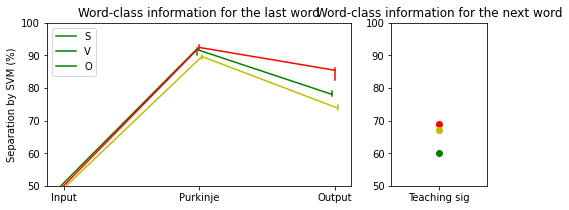

In [ ]:
########### linera SVM ##############
fig = plt.figure(figsize=(12, 3)) # figure area
plt.subplot(1,2,1)
plt.plot(np.arange(3)-0.02, acc_L_io[1,:3,3:4],  color='g');
for i in range(3):     plt.plot(i*np.array([1,1])-0.02, acc_L_io[[0,2],i,3:4], color='g')
plt.plot(np.arange(3)-0.0, acc_L_io[1,:3,4:5],  color='r');
for i in range(3):     plt.plot(i*np.array([1,1])-0.0, acc_L_io[[0,2],i,4:5], color='r')
plt.plot(np.arange(3)+0.02, acc_L_io[1,:3,5:],  color='y');
for i in range(3):     plt.plot(i*np.array([1,1])+0.02, acc_L_io[[0,2],i,5:], color='y')
plt.legend(['S','V','O'])
plt.xticks(np.arange(3)+0,['Input','Purkinje','Output']);  plt.title('Word-class information for the last word');
plt.ylabel('Separation by SVM (%)')
plt.ylim(50,100);
plt.subplot(1,6,4)
plt.plot(acc_L_io[1,-1:,3:4], 'o',  color='g');
plt.plot(acc_L_io[1,-1:,4:5],  'o', color='r');
plt.plot(acc_L_io[1,-1:,5:],  'o', color='y');
plt.xticks([0],['Teaching sig']);       plt.title('Word-class information for the next word');
plt.ylim(50,100);

In [ ]:
fig.savefig('./saved_img/pop1_5' +str_c[rnn_cond]+ '.pdf')

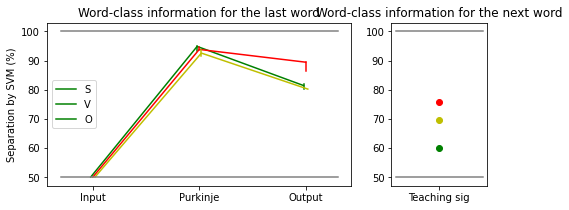

In [ ]:
########### non-linera SVM ##############
fig = plt.figure(figsize=(12, 3)) # figure area
plt.subplot(1,2,1)
plt.plot(np.arange(3)-0.02, acc_nL_io[1,:3,3:4],  color='g');
for i in range(3):     plt.plot(i*np.array([1,1])-0.02, acc_nL_io[[0,2],i,3:4], color='g')
plt.plot(np.arange(3)+0, acc_nL_io[1,:3,4:5],  color='r');
for i in range(3):     plt.plot(i*np.array([1,1])-0.0, acc_nL_io[[0,2],i,4:5], color='r')
plt.plot(np.arange(3)+0.02, acc_nL_io[1,:3,5:],  color='y');
for i in range(3):     plt.plot(i*np.array([1,1])+0.02, acc_nL_io[[0,2],i,5:], color='y')
plt.legend(['S','V','O'])
plt.xticks(np.arange(3)+0,['Input','Purkinje','Output']);  plt.title('Word-class information for the last word');
plt.ylabel('Separation by SVM (%)')
plt.plot([-0.3,2.3],[50,50],  color='gray');  plt.plot([-0.3,2.3],[100,100],  color='gray');  plt.ylim(47,103);
plt.subplot(1,6,4)
plt.plot(acc_nL_io[1,-1:,3:4], 'o',  color='g');
plt.plot(acc_nL_io[1,-1:,4:5],  'o', color='r');
plt.plot(acc_nL_io[1,-1:,5:],  'o', color='y');
plt.xticks([0],['Teaching sig']);       plt.title('Word-class information for the next word');
plt.plot([-0.3,0.3],[50,50],  color='gray');  plt.plot([-0.3,0.3],[100,100],  color='gray');  plt.ylim(47,103);

In [ ]:
fig.savefig('./saved_img/pop1_6' +str_c[rnn_cond]+ '.pdf')

In [ ]:
from scipy.stats import wilcoxon

In [ ]:
pop_acc_nL_io[1,4,:], pop_acc_nL_io[2,4,:]

(array([93.5, 90.7, 94.0, 93.5, 94.3, 91.7, 95.3, 95.0, 93.7, 94.7]),
 array([89.7, 85.8, 85.7, 89.7, 89.6, 86.1, 91.3, 89.6, 86.8, 89.3]))

In [ ]:
w, p_s = wilcoxon(pop_acc_nL_io[1,3,:]-pop_acc_nL_io[2,3,:]);
w, p_v = wilcoxon(pop_acc_nL_io[1,4,:]-pop_acc_nL_io[2,4,:]);
w, p_o = wilcoxon(pop_acc_nL_io[1,5,:]-pop_acc_nL_io[2,5,:]);

In [ ]:
p_s, p_v, p_o

(0.001953125, 0.001953125, 0.001953125)

In [ ]:
increments = inc_tmstep_valrate[0];   train_val_rate = inc_tmstep_valrate[2];   ep_lg = (len(loss_his[0])-1)/increments;
if len(inc_tmstep_valrate)>3:  lr = inc_tmstep_valrate[3];  # available after ver2006
increments, ep_lg, lr[0]

(32, 8.0, 0.008)

In [ ]:
######### below, only for intact cANN #############

In [ ]:
pop_acc_bins, pop_x_center, pop_bar_w, pop_wd_freq, pop_acc_wd, pop_acc_loc_val_corpus, pop_acc_loc_the, pop_n_bins = [],[],[],[],[],[],[],[]
for i in range(len(files)):
    ver = files[i];
    data3 = loadmat('./saved_mat/v'+str(ver)+'_2.mat')
    pop_acc_bins.append(data3['acc_bins']);  pop_x_center.append(data3['x_center']);
    pop_bar_w.append(data3['bar_w']);        pop_wd_freq.append(data3['wd_freq']);
    pop_acc_wd.append(data3['acc_wd']);      pop_acc_loc_val_corpus.append(data3['acc_loc_val_corpus']);
    pop_acc_loc_the.append(data3['acc_loc_the']);
    if 'n_bins' in data3:    pop_n_bins.append(data3['n_bins']);

In [ ]:
pop_acc_bins = np.stack(pop_acc_bins);                  pop_x_center = np.stack(pop_x_center)
pop_bar_w = np.stack(pop_bar_w);                        pop_wd_freq = np.stack(pop_wd_freq)
pop_acc_wd = np.stack(pop_acc_wd);                      pop_acc_loc_val_corpus = np.stack(pop_acc_loc_val_corpus)
pop_acc_loc_the = np.stack(pop_acc_loc_the);    # pop_svm_ax = np.stack(pop_svm_ax, axis=2)

In [ ]:
acc_L_io = np.percentile(pop_acc_L_io,[25,50,75],axis=2)
acc_nL_io = np.percentile(pop_acc_nL_io,[25,50,75],axis=2)

In [ ]:
x_center = pop_x_center[0,:];   bar_w = pop_bar_w[0,:];

In [ ]:
percentile_acc_bins  = np.percentile(pop_acc_bins,[25,50,75],axis=0)
x1=np.arange(0,6.5,0.002)

In [ ]:
pop_n_bins[0]

In [ ]:
fig = plt.figure(figsize=(8, 14)) # figure area
plt.bar(x_center, percentile_acc_bins[1,:], width=0.99*bar_w, edgecolor=0.7*np.array([1,1,1]),  color = [0.8,0.8,0.8])
for i in range(len(x_center)):     plt.plot(x_center[i]*np.array([1,1]), percentile_acc_bins[[0,2],i], color='black')
plt.plot(x1, 100-100*np.power(1-x1/100,5), color='black' )
plt.xscale("log")

In [ ]:
fig.savefig('./saved_img/pop1_7' +str_c[rnn_cond]+ '.pdf')

In [ ]:
pop_acc_loc_the

In [ ]:
pop_acc_loc_the = np.percentile(pop_acc_loc_the,[25,50,75],axis=0)

In [ ]:
x_1 = np.arange(12)+1

In [ ]:
fig = plt.figure(figsize=(14, 6)) # figure area
plt.plot(x_1, pop_acc_loc_the[1,:],  color=0.7*np.array([1,1,1]))
for i in range(len(x_center)):     plt.plot(x_1[i]*np.array([1,1]), pop_acc_loc_the[[0,2],i], color='black')

In [ ]:
fig.savefig('./saved_img/pop1_8' +str_c[rnn_cond]+ '.pdf')